
## Modelos lineales generalizados

Hasta ahora, hemos tenido variables de respuesta que, condicionadas por los predictores, se modelaban utilizando una distribución normal con una media que es alguna combinación lineal de los predictores. Esta combinación lineal es lo que hace que un modelo lineal sea "lineal".

$$
Y \mid {\bf X} = {\bf x} \sim N(\beta_0 + \beta_1x_1 + \ldots + \beta_{p - 1}x_{p - 1}, \ \sigma^2)
$$

Ahora vamos a permitir dos modificaciones de esta situación, que nos permitirán utilizar los modelos lineales en muchas más situaciones. En lugar de utilizar una distribución normal para la respuesta condicionada a los predictores, permitiremos otras distribuciones. Además, en lugar de que la media condicional sea una combinación lineal de los predictores, puede ser alguna función de una combinación lineal de los predictores.

En *general*, un modelo lineal generalizado tiene tres partes:

- Una **distribución** de la respuesta condicionada a los predictores.( Tecnicamente este distribuciones necesitan ser de la  <a href="https://en.wikipedia.org/wiki/Exponential_family"
    target="_blank">familia exponencial</a> of distributions.)
-   Una **combinación lineal** de los predictores $p - 1$, $\beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_{p - 1} x_{p - 1}$, la cual nosotros escribimos como $\eta({\bf x})$. Esto es, $$\eta({\bf x}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots  + \beta_{p - 1} x_{p - 1}$$

-   Una función **de enlace**, $g()$, que define cómo $\eta({\bf x})$, la combinación lineal de los predictores, se relaciona con la media de la respuesta condicionada a los predictores,  $\text{E}[Y \mid {\bf X} = {\bf x}]$.

$$
\eta({\bf x}) = g\left(\text{E}[Y \mid {\bf X} = {\bf x}]\right).
$$

La siguiente tabla resume tres ejemplos de modelo lineal generalizado:

|                                      | Linear Regression              | Poisson Regression                       | Logistic Regression                                                                               |
|----------------|-----------------|-------------------|--------------------|
| $Y \mid {\bf X} = {\bf x}$           | $N(\mu({\bf x}), \sigma^2)$    | $\text{Pois}(\lambda({\bf x}))$          | $\text{Bern}(p({\bf x}))$                                                                         |
| **Distribution Name**                | Normal                         | Poisson                                  | Bernoulli (Binomial)                                                                              |
| $\text{E}[Y \mid {\bf X} = {\bf x}]$ | $\mu({\bf x})$                 | $\lambda({\bf x})$                       | $p({\bf x})$                                                                                      |
| **Support**                          | Real: $(-\infty, \infty)$      | Integer: $0, 1, 2, \ldots$               | Integer: $0, 1$                                                                                   |
| **Usage**                            | Numeric Data                   | Count (Integer) Data                     | Binary (Class ) Data                                                                              |
| **Link Name**                        | Identity                       | Log                                      | Logit                                                                                             |
| **Link Function**                    | $\eta({\bf x}) = \mu({\bf x})$ | $\eta({\bf x}) = \log(\lambda({\bf x}))$ | $\eta({\bf x}) = \log \left(\frac{p({\bf x})}{1 - p({\bf x})} \right)$                            |
| **Mean Function**                    | $\mu({\bf x}) = \eta({\bf x})$ | $\lambda({\bf x}) = e^{\eta({\bf x})}$   | $p({\bf x}) = \frac{e^{\eta({\bf x})}}{1 + e^{\eta({\bf x})}} = \frac{1}{1 + e^{-\eta({\bf x})}}$ |

Al igual que en la regresión lineal ordinaria, intentaremos "ajustar" el modelo estimando los parámetros $\beta$. Para ello, utilizaremos el método de máxima verosimilitud.

Obsérvese que una distribución Bernoulli es un caso específico de una distribución binomial en la que el parámetro $n$ de una binomial es $1$. La regresión binomial también es posible, pero nos centraremos en el caso Bernoulli, mucho más popular.

Así, en general, los MLG relacionan la media de la respuesta con una combinación lineal de los predictores, $\eta({\bf x})$, mediante el uso de una función de enlace, $g()$. Es decir,

$$
\eta({\bf x}) = g\left(\text{E}[Y \mid {\bf X} = {\bf x}]\right).
$$

La media es entonces

$$
\text{E}[Y \mid {\bf X} = {\bf x}] = g^{-1}(\eta({\bf x})).
$$



## Respuesta binaria

Para ilustrar el uso de un MLG nos centraremos en el caso de respuestas binarias codificadas con variables de $0$ y $1$. En la práctica, estos $0$ y $1$ codificarán dos clases como sí/no, gato/perro, enfermo/sano, etc.

$$
Y =
\begin{cases}
      1 & \text{yes} \\
      0 & \text{no}
\end{cases}
$$

En primer lugar, definiremos algunos términos que utilizaremos a lo largo del texto.

$$
p({\bf x}) = P[Y = 1 \mid {\bf X} = {\bf x}]
$$

Con una respuesta binaria (Bernoulli), nos centraremos sobre todo en el caso en que $Y = 1$, ya que con sólo dos posibilidades, es trivial obtener probabilidades cuando $Y = 0$.

$$
P[Y = 0 \mid {\bf X} = {\bf x}] + P[Y = 1 \mid {\bf X} = {\bf x}] = 1
$$

$$
P[Y = 0 \mid {\bf X} = {\bf x}] = 1 - p({\bf x})
$$

Definimos ahora el modelo de **regresión logística**.

$$
\log\left(\frac{p({\bf x})}{1 - p({\bf x})}\right) = \beta_0 + \beta_1 x_1 + \ldots  + \beta_{p - 1} x_{p - 1}
$$

Inmediatamente notamos algunas similitudes con la regresión lineal ordinaria, en particular, el lado derecho. Se trata de nuestra combinación lineal habitual de los predictores. Tenemos nuestros habituales $p - 1$ predictores para un total de $p_\beta$ parámetros.

El lado izquierdo se denomina **log odds**, que es el logaritmo de las chances. Las chances son la probabilidad de un suceso positivo $(Y = 1)$ dividida por la probabilidad de un suceso negativo $(Y = 0)$. Por tanto, cuando las chances son $1$, los dos sucesos tienen la misma probabilidad. Las chances superiores a $1$ favorecen un suceso positivo. Lo contrario ocurre cuando las probabilidades son inferiores a $1$.

$$
\frac{p({\bf x})}{1 - p({\bf x})} = \frac{P[Y = 1 \mid {\bf X} = {\bf x}]}{P[Y = 0 \mid {\bf X} = {\bf x}]}
$$

Básicamente, las chances logarítmicas son
<a href="https://en.wikipedia.org/wiki/Logit" target="_blank">logit</a>
aplicada a $p({\bf x})$.

$$
\text{logit}(\xi) = \log\left(\frac{\xi}{1 - \xi}\right)
$$

También será útil definir el logit inverso, también conocido como "logístico" o
<a href="https://en.wikipedia.org/wiki/Sigmoid_function"
target="_blank">sigmoid</a> función.

$$
\text{logit}^{-1}(\xi) = \frac{e^\xi}{1 + e^{\xi}} = \frac{1}{1 + e^{-\xi}}
$$

Tenga en cuenta que para $x \in (-\infty, \infty))$ , esta función produce valores entre 0 y 1.

Los estudiantes a menudo preguntan, ¿dónde está el término de error? La respuesta es que es algo que es específico del modelo normal. En primer lugar, observe que el modelo modelo con el término de error,

$$
Y = \beta_0 + \beta_1x_1 + \ldots + \beta_qx_q + \epsilon, \ \ \epsilon \sim N(0, \sigma^2)
$$ puede escribirse como

$$
Y \mid {\bf X} = {\bf x} \sim N(\beta_0 + \beta_1x_1 + \ldots + \beta_qx_q, \ \sigma^2).
$$

Aunque nos centramos principalmente en estimar la media, $\beta_0 + \beta_1x_1 + \ldots + \beta_qx_q$, también hay otro parámetro, $\sigma^2$ que debe estimarse. Esto se debe a que la distribución normal tiene dos parámetros.

Con la regresión logística, que utiliza la distribución Bernoulli, sólo necesitamos estimar el único parámetro $p({\bf x})$ de la distribución Bernoulli, que resulta ser su media.

$$
\log\left(\frac{p({\bf x})}{1 - p({\bf x})}\right) = \beta_0 + \beta_1 x_1 + \ldots  + \beta_{q} x_{q}
$$

Por tanto, aunque hayamos introducido primero la regresión lineal ordinaria, en cierto modo, la regresión logística es en realidad más sencilla.

Observe que la aplicación de la transformación logit inversa nos permite obtener una expresión para $p({\bf x})$.

$$
p({\bf x}) = P[Y = 1 \mid {\bf X} = {\bf x}] = \frac{e^{\beta_0 + \beta_1 x_{1} + \cdots + \beta_{p-1} x_{(p-1)}}}{1 + e^{\beta_0 + \beta_1 x_{1} + \cdots + \beta_{p-1} x_{(p-1)}}}
$$



### Ajuste de la regresión logística

Con $n$ observaciones, escribimos el modelo indexado con $i$ para señalar que se está aplicando a cada observación.

$$
\log\left(\frac{p({\bf x_i})}{1 - p({\bf x_i})}\right) = \beta_0 + \beta_1 x_{i1} + \cdots + \beta_{p-1} x_{i(p-1)}
$$

Podemos aplicar la transformación logit inversa para obtener $P[Y_i = 1 \mid {\bf X_i} = {\bf x_i}]$ para cada observación. Como se trata de probabilidades, es bueno que hayamos utilizado una función que devuelva valores entre $0$ y $1$.

$$
p({\bf x_i}) = P[Y_i = 1 \mid {\bf X_i} = {\bf x_i}] = \frac{e^{\beta_0 + \beta_1 x_{i1} + \cdots + \beta_{p-1} x_{i(p-1)}}}{1 + e^{\beta_0 + \beta_1 x_{i1} + \cdots + \beta_{p-1} x_{i(p-1)}}}
$$

$$
1 - p({\bf x_i}) = P[Y_i = 0 \mid {\bf X} = {\bf x_i}] = \frac{1}{1 + e^{\beta_0 + \beta_1 x_{i1} + \cdots + \beta_{p-1} x_{i(p-1)}}}
$$

Para "ajustar" este modelo, es decir, estimar los parámetros $\beta$, utilizaremos la máxima verosimilitud.

$$
\boldsymbol{{\beta}} = [\beta_0, \beta_1, \beta_2, \beta_3, \ldots, \beta_{p - 1}]
$$

Primero escribimos la probabilidad dados los datos observados.

$$
L(\boldsymbol{{\beta}}) = \prod_{i = 1}^{n} P[Y_i = y_i \mid {\bf X_i} = {\bf x_i}]
$$

Esto ya es técnicamente una función de los parámetros $\beta$, pero vamos a hacer algunos reordenamientos para hacer esto más explícito.

$$
L(\boldsymbol{{\beta}}) = \prod_{i = 1}^{n} p({\bf x_i})^{y_i} (1 - p({\bf x_i}))^{(1 - y_i)}
$$

$$
L(\boldsymbol{{\beta}}) = \prod_{i : y_i = 1}^{n} p({\bf x_i}) \prod_{j : y_j = 0}^{n} (1 - p({\bf x_j}))
$$

$$
L(\boldsymbol{{\beta}}) = \prod_{i : y_i = 1}^{} \frac{e^{\beta_0 + \beta_1 x_{i1} + \cdots + \beta_{p-1} x_{i(p-1)}}}{1 + e^{\beta_0 + \beta_1 x_{i1} + \cdots + \beta_{p-1} x_{i(p-1)}}} \prod_{j : y_j = 0}^{} \frac{1}{1 + e^{\beta_0 + \beta_1 x_{j1} + \cdots + \beta_{p-1} x_{j(p-1)}}}
$$

\begin{aligned}
\ell(\boldsymbol{\beta} | \mathbf{Y} = \mathbf{y}, \mathbf{X} = \mathbf{x}) &= \log \left(\mathcal{L}(\boldsymbol{\beta} | \mathbf{Y} = \mathbf{y}, \mathbf{X} = \mathbf{x}) \right)= \sum_{i = 1}^N \left[y_i \log(p_i) + (1 - y_i)\log(1 - p_i) \right] \\
&= \sum_{i = 1}^N \left[y_i \log \left( \dfrac{p_i}{1 - p_i}\right) + \log(1 - p_i)\right] 
= \sum_{i = 1}^N \left[y_i \cdot \mathbf{x}_i \boldsymbol{\beta} - \log(1 + \exp \left( \mathbf{x}_i \boldsymbol{\beta} \right))\right]
\end{aligned}

$$
\dfrac{\partial \ell}{\partial \beta_j} = \sum_{i = 1}^N \left[ y_i x_j - \dfrac{1}{1 + \exp \left( \mathbf{x}_i \boldsymbol{\beta}\right)} \exp \left( \mathbf{x}_i \boldsymbol{\beta}\right) x_j\right] = \sum_{i = 1}^N \left[ \left( y_i - \dfrac{ \exp \left( \mathbf{x}_i \boldsymbol{\beta}\right)  }{1 + \exp \left( \mathbf{x}_i \boldsymbol{\beta}\right)} \right) x_j \right] = 0
$$


Lamentablemente, a diferencia de la regresión lineal ordinaria, no existe una solución analítica para este problema de maximización. En su lugar, habrá que resolverlo numéricamente. Afortunadamente, `Python` se encargará de ello por nosotros utilizando un algoritmo iterativo.



### Cuestiones de ajuste

Debemos señalar que, si existe alguna $\beta^*$ tal que

$$
{\bf x_i}^{\top} \boldsymbol{{\beta}^*} > 0 \implies y_i = 1
$$

y

$$
{\bf x_i}^{\top} \boldsymbol{{\beta}^*} < 0 \implies y_i = 0
$$

para todas las observaciones, entonces el MLE no es único. Se dice que estos datos son separables.


Cuando esto ocurre, el modelo sigue "ajustándose", pero hay consecuencias, a saber, que los coeficientes estimados son muy sospechosos. Esto supone un problema a la hora de interpretar el modelo. Cuando esto ocurre, el modelo suele seguir siendo útil para crear un clasificador, que se analizará más adelante. Sin embargo, sigue estando sujeto a las evaluaciones habituales de los clasificadores para determinar su rendimiento. Para más detalles, véase
<a
href="https://link.springer.com/content/pdf/10.1007/978-1-4757-2719-7_7.pdf"
target="_blank">Estadística Aplicada Moderna con S-PLUS, Capítulo 7</a>.



###  Ejemplos de simulación


In [1]:
import numpy as np
import pandas as pd
#
np.random.seed(123)
#
N = 1000
beta_vec = np.array([-2, 0.5, 0.2])
#
x1 = np.random.normal(loc = 2, scale = 1, size = N)
x2 = np.random.normal(loc = 10, scale = 2, size = N)
#
eta = np.column_stack((np.ones(N), x1, x2)).dot(beta_vec)
prob= 1 / (1 + np.exp(-eta))
#
y = np.random.binomial(p = prob, n = 1, size = N)
#
data_mat = pd.DataFrame((y, x1, x2), index = ["y", "x1", "x2"]).T

In [2]:
data_mat.head()

,y,x1,x2
0,1.0,0.914369,8.502345
1,1.0,2.997345,11.135189
2,1.0,2.282978,11.436301
3,1.0,0.493705,8.001239
4,1.0,1.421400,10.949797



Puede que piense, ¿por qué no utilizar simplemente la regresión lineal ordinaria? Incluso con una respuesta binaria, nuestro objetivo sigue siendo modelar (alguna función de) $\text{E}[Y \mid {\bf X} = {\bf x}]$. Sin embargo, con una respuesta binaria codificada como  $0$  y $1$, $\text{E}[Y \mid {\bf X} = {\bf x}] = P[Y = 1 \mid {\bf X} = {\bf x}]$
desde

$$
\begin{aligned}
\text{E}[Y \mid {\bf X} = {\bf x}] &=  1 \cdot P[Y = 1 \mid {\bf X} = {\bf x}] + 0 \cdot P[Y = 0 \mid {\bf X} = {\bf x}] \\
                                  &= P[Y = 1 \mid {\bf X} = {\bf x}]
\end{aligned}
$$

Entonces, ¿por qué no podemos utilizar la regresión lineal ordinaria para estimar?
$\text{E}[Y \mid {\bf X} = {\bf x}]$, y así
$P[Y = 1 \mid {\bf X} = {\bf x}]$?

Para investigarlo, vamos a simular los datos del siguiente modelo:

$$
\log\left(\frac{p({\bf x})}{1 - p({\bf x})}\right) = -2 + 3 x
$$

Otra forma de escribir esto, que se ajusta mejor a la función que estamos utilizando para simular los datos:

$$
\begin{aligned}
Y_i \mid {\bf X_i} = {\bf x_i} &\sim \text{Bern}(p_i) \\
p_i &= p({\bf x_i}) = \frac{1}{1 + e^{-\eta({\bf x_i})}} \\
\eta({\bf x_i}) &= -2 + 3 x_i
\end{aligned}
$$



Tras simular un conjunto de datos, ajustaremos tanto la regresión lineal ordinaria como la regresión logística. Observe que actualmente la variable de respuesta `y` es una variable numérica que sólo toma los valores `0` y `1`. Más adelante veremos que también podemos ajustar la regresión logística cuando la respuesta es una variable factorial con sólo dos niveles. (Generalmente, es preferible tener una respuesta factorial, pero tener una respuesta ficticia nos permite hacer la comparación con el uso de la regresión lineal ordinaria).


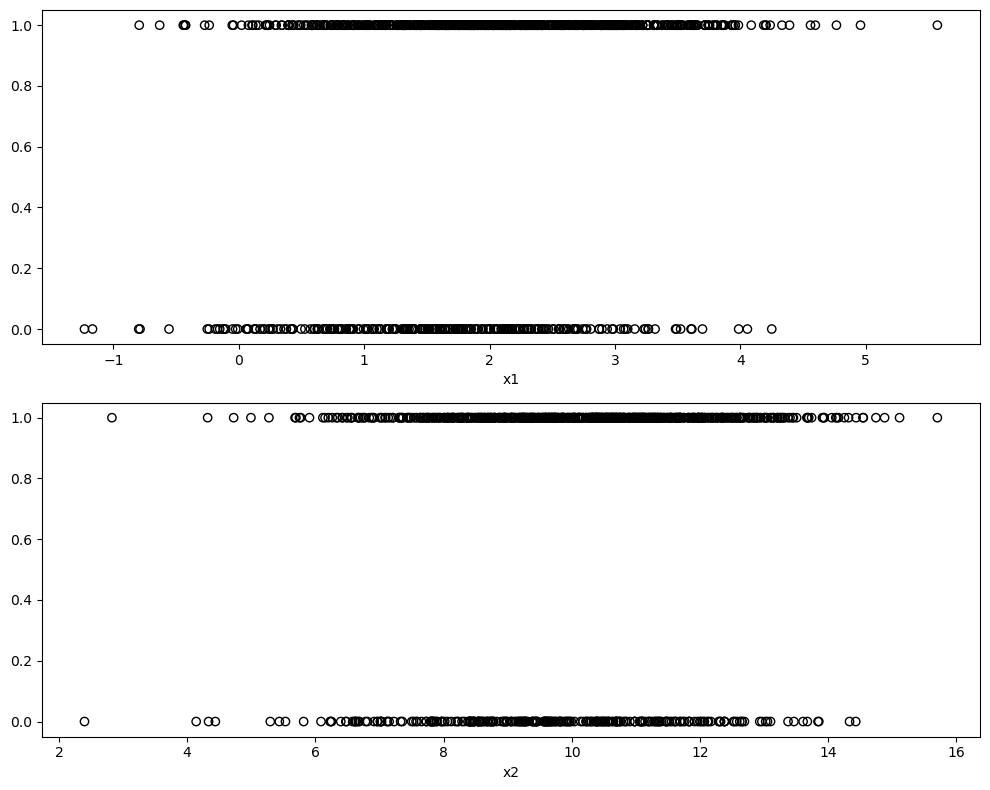

In [3]:
import matplotlib.pyplot as plt
#
fig = plt.figure(figsize = (10, 8))
_ = fig.add_subplot(2, 1, 1).scatter(x1, y, edgecolor = "black", color = "None")
_ = plt.xlabel("x1")
_ = fig.add_subplot(2, 1, 2).scatter(x2, y, edgecolor = "black", color = "None")
_ = plt.xlabel("x2")
_ = plt.tight_layout()
plt.show()

In [4]:
import statsmodels.formula.api as smf
#
mdl_ols = smf.ols("y ~ 1 + x1 + x2", data = data_mat).fit()
print(mdl_ols.summary2().tables[1])

              Coef.  Std.Err.         t         P>|t|    [0.025    0.975]
Intercept  0.174465  0.078411  2.224992  2.630493e-02  0.020594  0.328335
x1         0.108452  0.013679  7.928477  5.919460e-15  0.081609  0.135294
x2         0.033137  0.007145  4.637872  3.988320e-06  0.019116  0.047157


In [5]:
import statsmodels.api as sm
#
mdl_glm = smf.glm("y ~ 1 + x1 + x2", data = data_mat, 
              family = sm.families.Binomial(link = sm.genmod.families.links.logit())).fit()
print(mdl_glm.summary2().tables[1])

              Coef.  Std.Err.         z         P>|z|    [0.025    0.975]
Intercept -1.877325  0.425286 -4.414263  1.013545e-05 -2.710871 -1.043780
x1         0.577192  0.077278  7.468995  8.080979e-14  0.425729  0.728655
x2         0.177027  0.039164  4.520162  6.179230e-06  0.100267  0.253787



Observa que la sintaxis es muy similar. ¿Qué ha cambiado?

- `smf.ols()` se ha convertido en `smf.glm()`.
- Hemos añadido el argumento `family = sm.families.Binomial(link = sm.genmod.families.links.logit())`.

En muchos sentidos, `smf.ols()` no es más que una versión más específica de `smf.glm()`.



Hacer predicciones con un objeto de tipo `glm` es ligeramente diferente a hacer predicciones después de ajustar con `lm()`. En el caso de la regresión logística, con `family = binomial`, tenemos:

| `type`               | Returned                                                                                                                  |
|------------------------------------------------|-------------------------|
| `"link"` | $\hat{\eta}({\bf x}) = \log\left(\frac{\hat{p}({\bf x})}{1 - \hat{p}({\bf x})}\right)$                                    |
| `"response"`  \[default\]        | $\hat{p}({\bf x}) = \frac{e^{\hat{\eta}({\bf x})}}{1 + e^{\hat{\eta}({\bf x})}} = \frac{1}{1 + e^{-\hat{\eta}({\bf x})}}$ |

Si dentro de la función predict ponemos el atributo `linear = True` obtendremos el logaritmo de las chances o log odds, mientras que con  `linear = False` (la opción por defecto) tendremos el retorno del valor esperado, en este caso, $P[Y = 1 \mid {\bf X} = {\bf x}]$ para cada observación.


Adicionalmente, podemos estimar el modelo logit de una forma directa:

In [6]:
mdl_logit_fit = smf.logit("y ~ 1 + x1 + x2", data = data_mat).fit()


Optimization terminated successfully.
         Current function value: 0.554489
         Iterations 6


In [7]:
print(mdl_logit_fit.summary2().tables[1])

              Coef.  Std.Err.         z         P>|z|    [0.025    0.975]
Intercept -1.877325  0.425286 -4.414263  1.013546e-05 -2.710871 -1.043780
x1         0.577192  0.077278  7.468994  8.080996e-14  0.425729  0.728655
x2         0.177027  0.039164  4.520162  6.179234e-06  0.100267  0.253787


In [8]:
data_predict = pd.DataFrame(
        [np.linspace(start = data_mat["x1"].min(), stop = data_mat["x1"].max(), num = 500),
         np.linspace(start = data_mat["x2"].min(), stop = data_mat["x2"].max(), num = 500)],
         index = ["x1", "x2"]).T
ols_pred = mdl_ols.predict(exog = data_predict)
glm_pred = mdl_glm.predict(exog = data_predict)
glm_pred

0      0.103076
1      0.104246
2      0.105427
3      0.106620
4      0.107825
         ...   
495    0.983172
496    0.983379
497    0.983584
498    0.983786
499    0.983986
Length: 500, dtype: float64

Note que arriba calculamos $\widehat{\mu} = g^{-1}(\mathbf{X} \widehat{\beta})$. Si queremos calcular el valor predicho por $\mathbf{X} \widehat{\beta}$, tenemos: 

In [9]:
x_beta_predict = mdl_glm.predict(exog = data_predict, linear = True)
print(x_beta_predict.head(5))

0   -2.163504
1   -2.150915
2   -2.138327
3   -2.125738
4   -2.113150
dtype: float64


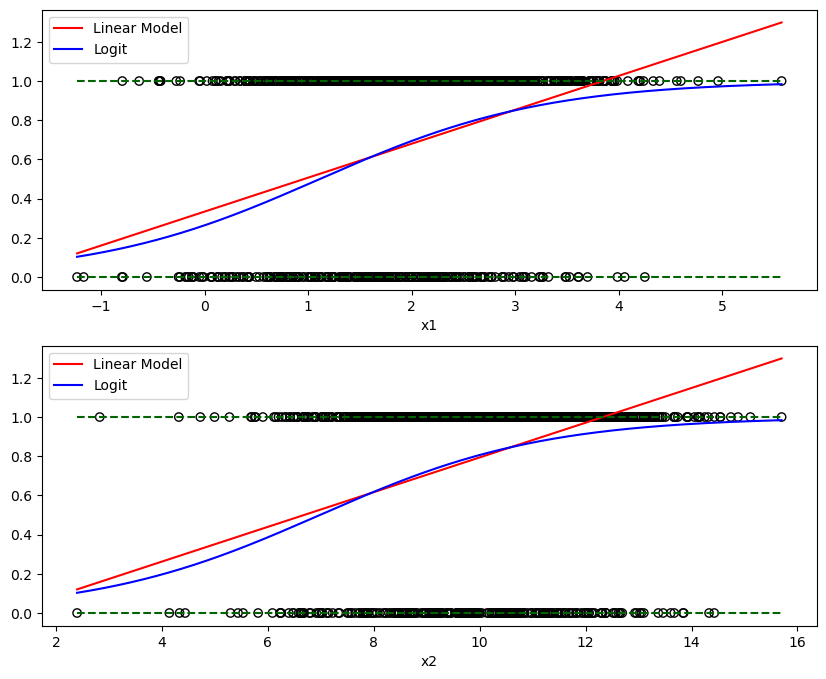

In [10]:
import matplotlib.pyplot as plt
import numpy as np



fig = plt.figure(figsize=(10, 8))

for i in range(0, 2):
    j = ["x1", "x2"][i]
    
    # Creamos el subplot solo una vez.
    ax = fig.add_subplot(2, 1, i + 1)
    
    # scatter plot
    ax.scatter(data_mat[j], data_mat["y"], edgecolor="black", color="None")
    
    # linear model plot
    ax.plot(data_predict[j], ols_pred, color="red", label="Linear Model")
    
    # logit model plot
    ax.plot(data_predict[j], glm_pred, color="blue", label="Logit")
    
    # horizontal lines
    ax.hlines(y=[0, 1], linestyles="dashed", color="darkgreen",
              xmin=data_predict[j].min(), xmax=data_predict[j].max())
    
    # Establece la etiqueta x para cada subplot.
    ax.set_xlabel(j)
    
    # Establece la leyenda para cada subplot.
    ax.legend(loc="upper left")

# Mostrar la figura
plt.show()



Como sólo tenemos una variable predictora, podemos representar gráficamente esta situación. En primer lugar, observe que los datos se representan mediante puntos negros. La respuesta `y` sólo toma valores `0` y `1`.

A continuación, tenemos que hablar de las dos líneas añadidas al gráfico. La primera, la línea roja continua, es la regresión lineal ordinaria ajustada.

La curva azul es la regresión logística estimada. Es útil darse cuenta de que no estamos trazando una estimación de $Y$ para ninguna de las dos. (A veces puede parecer así con la regresión lineal ordinaria, pero eso no es lo que está ocurriendo). Para ambos, estamos trazando $\hat{\text{E}}[Y \mid {\bf X} = {\bf x}]$, la media estimada, que para una respuesta binaria resulta ser una estimación de $P[Y = 1 \mid {\bf X} = {\bf x}]$.

Inmediatamente vemos por qué la regresión lineal ordinaria no es una buena idea. Mientras está estimando la media, ¡vemos que produce estimaciones que son menores que 0! (¡Y en otras situaciones podría producir estimaciones mayores que 1!) Si la media es una probabilidad, no queremos probabilidades menores que 0 o mayores que 1.

Dado que la salida de la función logit inversa está restringida a estar entre 0 y 1, nuestras estimaciones tienen mucho más sentido como probabilidades. 

## Ejemplo númerico


Supongamos que tenemos el siguiente modelo estimado:

$$
\log\left(\frac{\hat{p}({\bf x})}{1 - \hat{p}({\bf x})}\right) = -2.3 + 3.7 x
$$

Dado que no estamos estimando directamente la media, sino una función de la media, tenemos que tener cuidado con nuestra interpretación de $\hat{\beta}_1 = 3.7$. Esto significa que, para un aumento de una unidad en $x$, las probabilidades logarítmicas cambian (en este caso aumentan) en $3.7$. Además, como $\hat{\beta}_1$ es positivo, a medida que aumentamos $x$ también aumentamos $\hat p ({\bf x})$. Para ver cuánto, tenemos que considerar la función logística inversa.

Por ejemplo, tenemos:

$$
\hat{P}[Y = 1 \mid X = -0.5] = \frac{e^{-2.3 + 3.7 \cdot (-0.5)}}{1 + e^{-2.3 + 3.7 \cdot (-0.5)}} \approx 0.016
$$

$$
\hat{P}[Y = 1 \mid X = 0] = \frac{e^{-2.3 + 3.7 \cdot (0)}}{1 + e^{-2.3 + 3.7 \cdot (0)}} \approx 0.09112296
$$

$$
\hat{P}[Y = 1 \mid X = 1] = \frac{e^{-2.3 + 3.7 \cdot (1)}}{1 + e^{-2.3 + 3.7 \cdot (1)}} \approx 0.8021839
$$

Ahora que sabemos que debemos utilizar la regresión logística, y no la regresión lineal ordinaria, consideremos otro ejemplo. Esta vez, consideremos el modelo

$$
\log\left(\frac{p({\bf x})}{1 - p({\bf x})}\right) = 1 + -4 x.
$$

De nuevo, podríamos reescribir esto para que se ajuste mejor a la función que estamos utilizando para simular los datos:

$$
\begin{aligned}
Y_i \mid {\bf X_i} = {\bf x_i} &\sim \text{Bern}(p_i) \\
p_i &= p({\bf x_i}) = \frac{1}{1 + e^{-\eta({\bf x_i})}} \\
\eta({\bf x_i}) &= 1 + -4 x_i
\end{aligned}
$$

En este modelo, a medida que $x$ aumenta, las probabilidades logarítmicas disminuyen.



Ahora vamos a ver un ejemplo en el que la probabilidad estimada no siempre simplemente aumenta o disminuye. Al igual que la regresión lineal ordinaria, la combinación lineal de predictores puede contener transformaciones de predictores (en este caso un término cuadrático) e interacciones.



$$
\log\left(\frac{p({\bf x})}{1 - p({\bf x})}\right) = -1.5 + 0.5x + x^2.
$$

De nuevo, podríamos reescribir esto para que se ajuste mejor a la función que estamos utilizando para simular los datos:

$$
\begin{aligned}
Y_i \mid {\bf X_i} = {\bf x_i} &\sim \text{Bern}(p_i) \\
p_i &= p({\bf x_i}) = \frac{1}{1 + e^{-\eta({\bf x_i})}} \\
\eta({\bf x_i}) &= -1.5 + 0.5x_i + x_i^2
\end{aligned}
$$



## Trabajar con regresión logística

Aunque el modelo de regresión logística no es exactamente igual que el modelo de regresión lineal ordinaria, ya que ambos utilizan una **combinación lineal** de los predictores

$$
\eta({\bf x}) = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots  + \beta_{p - 1} x_{p - 1}
$$

trabajar con regresión logística es muy similar. Muchas de las cosas que con la regresión lineal ordinaria se pueden hacer con la regresión logística de manera muy similar. Por ejemplo,

- Pruebas para un único parámetro $\beta$
- Pruebas para un conjunto de parámetros $\beta$
- Especificación de fórmulas en Python
- Interpretación de parámetros y estimaciones
- Intervalos de confianza de los parámetros
- Intervalos de confianza para la respuesta media
- Selección de variables

Tras una introducción a las nuevas pruebas, demostraremos cada una de ellas mediante un ejemplo. 



### Pruebas con MLG

Al igual que la regresión lineal ordinaria, querremos realizar pruebas de hipótesis. Podemos hacer pruebas de parámetro único como de múltiples parámetros.

### Prueba de Wald

En la regresión lineal ordinaria, realizamos la prueba de

$$
H_0: \beta_j = 0 \quad \text{vs} \quad H_1: \beta_j \neq 0
$$

usando un $t$-test.

Para el modelo de regresión logística,

$$
\log\left(\frac{p({\bf x})}{1 - p({\bf x})}\right) = \beta_0 + \beta_1 x_1 + \ldots  + \beta_{p - 1} x_{p - 1}
$$

podemos volver a realizar una prueba de

$$
H_0: \beta_j = 0 \quad \text{vs} \quad H_1: \beta_j \neq 0
$$

sin embargo, el estadístico de prueba y su distribución ya no son $t$. Vemos que el estadístico de prueba adopta la misma forma

$$
z = \frac{\hat{\beta}_j - \beta_j}{\text{SE}[\hat{\beta}_j]} \overset{\text{approx}}{\sim} N(0, 1)
$$

pero ahora estamos realizando una prueba $z$, ya que la estadística de la prueba se aproxima a una distribución normal estándar, *siempre que tengamos una muestra lo suficientemente grande*. (La prueba $t$ para la regresión lineal ordinaria, suponiendo que los supuestos fueran correctos, tenía una distribución exacta para cualquier tamaño de muestra).

Omitiremos algunos de los detalles exactos de los cálculos, ya que `Python` obtendrá el error estándar por nosotros. El uso de esta prueba será extremadamente similar a la prueba $t$ para la regresión lineal ordinaria. Esencialmente lo único que cambia es la distribución de la estadística de prueba.


In [11]:
print(mdl_logit_fit.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.066     
Dependent Variable: y                AIC:              1114.9782 
Date:               2023-11-14 09:58 BIC:              1129.7015 
No. Observations:   1000             Log-Likelihood:   -554.49   
Df Model:           2                LL-Null:          -593.90   
Df Residuals:       997              LLR p-value:      7.6932e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.8773    0.4253  -4.4143  0.0000  -2.7109  -1.0438
x1             0.5772    0.0773   7.4690  0.0000   0.4257   0.7287
x2             0.1770    0.0392   4.5202  0.0000   0.1003   0.2538



Es posible utilizar como función link a la función normal, en este  caso el modelo ajustado será de tipo 'probit', a continuación realizaremos el ajuste para los datos de nuestra la simulación inicial. Observe los cambios:

In [12]:
mdl_probit_fit= smf.probit("y ~ 1 + x1 + x2", data = data_mat).fit()

Optimization terminated successfully.
         Current function value: 0.554021
         Iterations 5


In [13]:
print(mdl_probit_fit.summary2())

                         Results: Probit
Model:              Probit           Pseudo R-squared: 0.067     
Dependent Variable: y                AIC:              1114.0412 
Date:               2023-11-14 09:58 BIC:              1128.7645 
No. Observations:   1000             Log-Likelihood:   -554.02   
Df Model:           2                LL-Null:          -593.90   
Df Residuals:       997              LLR p-value:      4.8155e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -1.1183    0.2507  -4.4618  0.0000  -1.6096  -0.6271
x1             0.3467    0.0453   7.6563  0.0000   0.2579   0.4354
x2             0.1062    0.0229   4.6335  0.0000   0.0613   0.1511




### Prueba de razón de verosimilitud

Considere el siguiente modelo **completo**,

$$
\log\left(\frac{p({\bf x_i})}{1 - p({\bf x_i})}\right) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_{(p-1)} x_{i(p-1)}
$$

Este modelo tiene $p - 1$ predictores, para un total de $p$ $\beta$-parámetros. Denotaremos el MLE de estos parámetros $\beta$ como $\hat{\beta}_{\text{Full}}$

Consideremos ahora un modelo **nulo** (o **reducido**),

$$
\log\left(\frac{p({\bf x_i})}{1 - p({\bf x_i})}\right) = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_{(q-1)} x_{i(q-1)}
$$

donde $q < p$. Este modelo tiene $q - 1$ predictores, para un total de $q$ $\beta$-parámetros. Denotaremos el MLE de estos parámetros $\beta$ como $\hat{\beta}_{Null}$.

La diferencia entre estos dos modelos puede codificarse mediante la hipótesis nula de una prueba.

$$
H_0: \beta_q = \beta_{q+1} = \cdots = \beta_{p - 1} = 0.
$$

Esto implica que el modelo reducido está anidado dentro del modelo completo.

A continuación definimos un estadístico de prueba, $D$,

$$
D = -2 \log \left( \frac{L(\boldsymbol{\hat{\beta}_{\text{Null}}})} {L(\boldsymbol{\hat{\beta}_{\text{Full}}})} \right) = 2 \log \left( \frac{L(\boldsymbol{\hat{\beta}_{\text{Full}}})} {L(\boldsymbol{\hat{\beta}_{\text{Null}}})} \right) = 2 \left( \ell(\hat{\beta}_{\text{Full}}) - \ell(\hat{\beta}_{\text{Null}})\right)
$$

donde $L$ denota una probabilidad y $\ell$ denota una probabilidad logarítmica. Para una muestra suficientemente grande, este estadístico de prueba tiene una distribución Chi-cuadrado aproximada

$$
D \overset{\text{approx}}{\sim} \chi^2_{k}
$$

donde $k = p - q$, la diferencia en número de parámetros de los dos modelos.

Esta prueba, que llamaremos **Prueba de la razón de verosimilitud**, será el análogo de la prueba $F$ de ANOVA para la regresión logística. Para realizar la prueba Likelihood-Ratio no existe una función predefinida en `Python` por lo que haremos una implementación pequeña para ello.

Vale la pena mencionar que la Prueba de Likelihood-Ratio es en realidad una prueba bastante general, sin embargo, aquí hemos presentado una aplicación específica a los modelos de regresión logística anidados.


El siguiente código muestra los resultados de la prueba de razon de verosimilitud que nos permite determinar la singificancia global del modelo: 

In [14]:
print('LLR value:', mdl_probit_fit.llr)
print('LLR p-value:', mdl_probit_fit.llr_pvalue)

LLR value: 79.74939574182281
LLR p-value: 4.81547072648454e-18


En el ejemplo desarrollaremos la prueba de razon de verosimulitud para dos modelos anidados. 


### Ejemplo de `SAheart`.

Para ilustrar el uso de la regresión logística, utilizaremos el conjunto de datos `SAheart del paquete `bestglm`.


In [15]:
# pip install openml
# Este paquete tiene varias utilidades para el aprendizaje de máquina pero se ha especializado en la colección
# de base de datos ademas de los mejores resultados que se han obtenido por distintos algoritmos. 

In [16]:
import openml

# Fetch the SAheart dataset from OpenML
dataset = openml.datasets.get_dataset(1498)
SAheart, meta, _, attribute_names = dataset.get_data(target=dataset.default_target_attribute, include_ignore_attribute=True)

# Ensure the target attribute (class label) is included in the dataframe
SAheart[dataset.default_target_attribute] = meta

# Display the first few rows of the dataset to understand its structure
print(SAheart.head())



C:\Users\a.tabaresp\AppData\Roaming\Python\Python39\site-packages\openml\datasets\functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


    V1     V2    V3     V4 V5  V6     V7     V8  V9 Class
0  160  12.00  5.73  23.11  1  49  25.30  97.20  52     2
1  144   0.01  4.41  28.61  2  55  28.87   2.06  63     2
2  118   0.08  3.48  32.28  1  52  29.14   3.81  46     1
3  170   7.50  6.41  38.03  1  51  31.99  24.26  58     2
4  134  13.60  3.50  27.78  1  60  25.99  57.34  49     2


In [17]:
SAheart = SAheart.rename(columns={
     'V1': 'sbp',
     'V2': 'tobacco',
     'V3': 'ldl',
     'V4': 'adiposity',
     'V5': 'famhist',
     'V6': 'typea',
     'V7': 'obesity',
     'V8': 'alcohol',
     'V9': 'age',
     'Class': 'chd'
 })

In [18]:
SAheart.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [19]:
SAheart['chd'] = SAheart['chd'].astype('category')


Estos datos proceden de una muestra retrospectiva de varones de una región del Cabo Occidental (Sudáfrica) con alto riesgo de cardiopatía. La variable `chd`, que utilizaremos como respuesta, indica si un individuo padece o no una enfermedad coronaria. Tenga en cuenta que se codifica como una variable numérica `0` / `1`. 

Los predictores son varias medidas para cada individuo, muchas relacionadas con la salud del corazón. Por ejemplo, `sbp`, presión arterial sistólica, y `ldl`, colesterol de lipoproteínas de baja densidad. 

Empezaremos intentando modelizar la probabilidad de sufrir una cardiopatía coronaria en función del colesterol de lipoproteínas de baja densidad. Es decir, ajustaremos el modelo

$$
\log\left(\frac{P[\texttt{chd} = 1]}{1 - P[\texttt{chd} = 1]}\right) = \beta_0 + \beta_{\texttt{ldl}} x_{\texttt{ldl}}
$$


In [20]:

# Logistic regression model with 'ldl' as a predictor
chd_mod_ldl = smf.glm('chd ~ ldl', data=SAheart, family=sm.families.Binomial()).fit()



Como antes, representamos los datos además de las probabilidades estimadas. Obsérvese que hemos "ajustados" los datos para facilitar su visualización, pero los datos sólo toman los valores `0` y `1`.

Como era de esperar, este gráfico indica que a medida que aumenta `ldl`, también lo hace la probabilidad de `chd`.


In [21]:
chd_mod_ldl.predict(exog=dict(ldl=[5, 10, 15]))

0    0.644594
1    0.314763
2    0.104214
dtype: float64

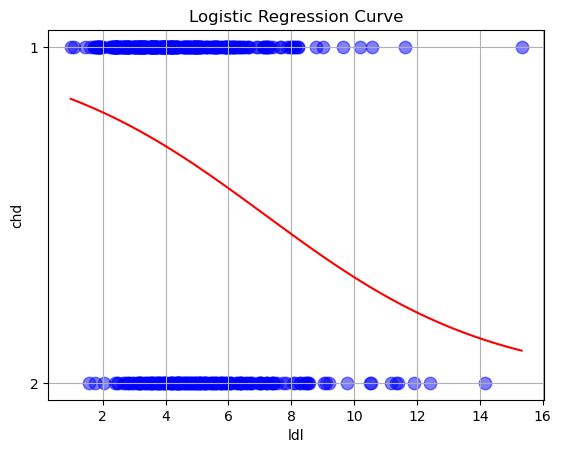

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Suponiendo que chd_mod_ldl es tu modelo ya ajustado y SAheart es tu DataFrame
pred_input = pd.DataFrame({'ldl': np.linspace(SAheart['ldl'].min(), SAheart['ldl'].max(), 100)})
# Asegúrate de añadir la constante si fue incluida en el modelo original
pred_input = sm.add_constant(pred_input)

# Calcular las predicciones
pred_output = chd_mod_ldl.predict(pred_input)

# Ahora graficar utilizando matplotlib
plt.scatter(SAheart['ldl'], SAheart['chd'], s=80, c='blue', alpha=0.5)  # Datos reales
plt.plot(pred_input['ldl'], pred_output, c='red')  # Curva de regresión
plt.xlabel('ldl')
plt.ylabel('chd')
plt.title('Logistic Regression Curve')
plt.grid(True)
plt.show()


In [23]:
# imprimir el resumen del modelo
print(chd_mod_ldl.summary2())

                 Results: Generalized linear model
Model:              GLM                  AIC:            568.2788  
Link Function:      Logit                BIC:            -2258.0810
Dependent Variable: ['chd[1]', 'chd[2]'] Log-Likelihood: -282.14   
Date:               2023-11-14 09:58     LL-Null:        -298.05   
No. Observations:   462                  Deviance:       564.28    
Df Model:           1                    Pearson chi2:   462.      
Df Residuals:       460                  Scale:          1.0000    
Method:             IRLS                                           
---------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
---------------------------------------------------------------------
Intercept    1.9687     0.2731    7.2092   0.0000    1.4334    2.5039
ldl         -0.2747     0.0516   -5.3188   0.0000   -0.3759   -0.1734



In [24]:
# imprimir los parámetros del modelo
print(chd_mod_ldl.params)

Intercept    1.968668
ldl         -0.274661
dtype: float64



Para realizar la prueba

$$
H_0: \beta_{\texttt{ldl}} = 0
$$

utilizamos la función `summary()` como hemos hecho tantas veces antes. Al igual que la prueba $t$ para la regresión lineal ordinaria, devuelve la estimación del parámetro, su error estándar, la estadística de prueba relevante ($z$) y su valor p. Aquí tenemos un valor p increíblemente bajo, por lo que rechazamos la hipótesis nula. La variable `ldl` parece ser un predictor significativo.



Al ajustar la regresión logística, podemos utilizar la misma sintaxis de fórmula que la regresión lineal ordinaria. Así, para ajustar un modelo aditivo utilizando todos los predictores disponibles, utilizamos:


In [25]:
# Logistic regression model with 'all the predictors

chd_mod_additive  = smf.glm('chd ~ sbp + tobacco + ldl + adiposity + famhist + typea + obesity + alcohol + age', data=SAheart, family=sm.families.Binomial()).fit()

In [26]:
# imprimir el resumen del modelo
print(chd_mod_additive.summary2())

                 Results: Generalized linear model
Model:              GLM                  AIC:            492.1400  
Link Function:      Logit                BIC:            -2301.1353
Dependent Variable: ['chd[1]', 'chd[2]'] Log-Likelihood: -236.07   
Date:               2023-11-14 09:58     LL-Null:        -298.05   
No. Observations:   462                  Deviance:       472.14    
Df Model:           9                    Pearson chi2:   452.      
Df Residuals:       452                  Scale:          1.0000    
Method:             IRLS                                           
--------------------------------------------------------------------
                 Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
--------------------------------------------------------------------
Intercept        5.2254    1.3153   3.9727  0.0001   2.6474   7.8033
famhist[T.2]     0.9254    0.2279   4.0605  0.0000   0.4787   1.3720
sbp             -0.0065    0.0057  -1.1350  0.2564  -0.0177 


A continuación, podemos utilizar la prueba de la razón de verosimilitud para comparar los dos modelos. En concreto, estamos probando

$$
H_0: \beta_{\texttt{sbp}} = \beta_{\texttt{tobacco}} = \beta_{\texttt{adiposity}} = \beta_{\texttt{famhist}} = \beta_{\texttt{typea}} = \beta_{\texttt{obesity}} = \beta_{\texttt{alcohol}} = \beta_{\texttt{age}} = 0
$$

Podríamos calcular manualmente la estadística de la prueba,


In [27]:
from scipy.stats import chi2

def lrt_test(model1, model2):
    """
    Perform the likelihood ratio test between two models.
    """
    llf_1 = model1.llf
    llf_2 = model2.llf
    G = 2 * (llf_1 - llf_2)
    df = model1.df_model - model2.df_model
    p_value = chi2.sf(G, df)
    return G, p_value

G, p_value = lrt_test(chd_mod_additive,chd_mod_ldl)
print("LRT Statistic:", G)
print("P-value:", p_value)


LRT Statistic: 92.13878967051443
P-value: 1.709923264270137e-16



Vemos que el estadístico de prueba que acabamos de calcular aparece en la salida. El valor p, muy pequeño, sugiere que preferimos el modelo más amplio.

Aunque preferimos el modelo aditivo al modelo con un único predictor, ¿realmente necesitamos todos los predictores del modelo aditivo? supongamos que realizamos un proceso de selección de variables, lo que nos dió como resultado el siguiente modelo.

In [28]:
# Logistic regression model with 'ldl' as a predictor
chd_mod_selected  = smf.glm('chd ~ tobacco + ldl + famhist + typea + age', data=SAheart, family=sm.families.Binomial()).fit()

print(chd_mod_selected.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['chd[1]', 'chd[2]']   No. Observations:                  462
Model:                              GLM   Df Residuals:                      456
Model Family:                  Binomial   Df Model:                            5
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -237.84
Date:                  Tue, 14 Nov 2023   Deviance:                       475.69
Time:                          09:58:56   Pearson chi2:                     458.
No. Iterations:                       5   Pseudo R-squ. (CS):             0.2295
Covariance Type:              nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.5383     


Podríamos comparar de nuevo este modelo con los modelos aditivos.

$$
H_0: \beta_{\texttt{sbp}} = \beta_{\texttt{adiposity}} = \beta_{\texttt{obesity}} = \beta_{\texttt{alcohol}} = 0
$$


In [29]:
lrt_test(chd_mod_additive,chd_mod_selected)


(3.545545661250742, 0.4709869043745185)


Aquí parece que preferiríamos el modelo seleccionado.



### Intervalos de confianza

Podemos crear intervalos de confianza para los parámetros $\beta$ utilizando la función `confint()` como hicimos con la regresión lineal ordinaria.


In [30]:
# Intervalos de confianza para los coeficientes
print(chd_mod_selected.conf_int(alpha=0.05))

                     0         1
Intercept     3.719786  7.356753
famhist[T.2]  0.465697  1.350654
tobacco      -0.131099 -0.029652
ldl          -0.269729 -0.054255
typea        -0.060962 -0.013269
age          -0.070464 -0.030457



Observe que podríamos crear intervalos reordenando los resultados de la prueba de Wald para obtener el intervalo de confianza de Wald. Éste vendría dado por

$$
\hat{\beta}_j \pm z_{\alpha/2} \cdot \text{SE}[\hat{\beta}_j].
$$




### Intervalos de confianza para la respuesta media

Los intervalos de confianza para la respuesta media requieren una reflexión adicional. Con una muestra "suficientemente grande", tenemos

$$
\frac{\hat{\eta}({\bf x}) - \eta({\bf x})}{\text{SE}[\hat{\eta}({\bf x})]} \overset{\text{approx}}{\sim} N(0, 1)
$$

Entonces podemos crear un aproximado $(1 - \alpha)\%$ intervalos de confianza para $\eta({\bf x})$ usando

$$
\hat{\eta}({\bf x}) \pm z_{\alpha/2} \cdot \text{SE}[\hat{\eta}({\bf x})]
$$

donde $z_{\alpha/2}$ es el valor crítico tal que
$P(Z > z_{\alpha/2}) = \alpha/2$.

No se trata de un intervalo especialmente interesante. En cambio, lo que realmente queremos es un intervalo para la respuesta media, $p({\bf x})$. Para obtener un intervalo para $p({\bf x})$, simplemente aplicamos la transformada logarítmica inversa a los puntos finales del intervalo para $\eta.$

$$
\left(\text{logit}^{-1}(\hat{\eta}({\bf x}) - z_{\alpha/2} \cdot \text{SE}[\hat{\eta}({\bf x})] ), \ \text{logit}^{-1}(\hat{\eta}({\bf x}) + z_{\alpha/2} \cdot \text{SE}[\hat{\eta}({\bf x})])\right)
$$

Para demostrar la creación de estos intervalos, consideraremos una nueva observación.


In [31]:
# For confidence intervals
print(chd_mod_additive.conf_int(0.01))




                     0         1
Intercept     1.837321  8.613380
famhist[T.2]  0.338354  1.512386
sbp          -0.021265  0.008257
tobacco      -0.147901 -0.010852
ldl          -0.327602 -0.020245
adiposity    -0.094031  0.056858
typea        -0.071330 -0.007860
obesity      -0.051065  0.176885
alcohol      -0.011670  0.011426
age          -0.076470 -0.013981



En primer lugar, vamos a utilizar la función `predict()` para obtener $\hat{\eta}({\bf x})$ para esta observación.


In [32]:
SAheart['famhist'].unique()

['1', '2']
Categories (2, object): ['1' < '2']

In [33]:

# Making predictions for a new observation
new_obs = pd.DataFrame([{
  'sbp': 148.0,
  'tobacco': 5.0,
  'ldl': 12.0,
  'adiposity': 31.23,
  'famhist': '2',
  'typea': 47,
  'obesity': 28.50,
  'alcohol': 23.89,
  'age': 60
}])

In [34]:
# Using 'type' link for linear prediction
eta_hat = chd_mod_additive.get_prediction(new_obs, linear=False).summary_frame()
print(eta_hat)


       mean   mean_se  mean_ci_lower  mean_ci_upper
0  0.340568  0.102588       0.174211       0.558369



Nótese que, como era de esperar, los límites de este intervalo están ambos entre 0 y 1. Además, como ambos límites del intervalo para $\eta({\bf x})$ son positivos, ambos límites del intervalo para $p({\bf x})$ son mayores que 0.5.



### Sintaxis de la fórmula

Sin realmente pensar en ello, hemos estado utilizando nuestro conocimiento previo de la sintaxis de la fórmula del modelo de `Python` para ajustar la regresión logística.



#### Interacciones

Vamos a añadir una interacción entre LDL y los antecedentes familiares para el modelo que hemos seleccionado.


In [35]:
# Logistic regression model with interaction
chd_mod_interaction = smf.glm('chd ~ alcohol + ldl + famhist + typea + age + ldl:famhist', data=SAheart, family=sm.families.Binomial()).fit()
print(chd_mod_interaction.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['chd[1]', 'chd[2]']   No. Observations:                  462
Model:                              GLM   Df Residuals:                      455
Model Family:                  Binomial   Df Model:                            6
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -238.73
Date:                  Tue, 14 Nov 2023   Deviance:                       477.46
Time:                          09:58:56   Pearson chi2:                     446.
No. Iterations:                       5   Pseudo R-squ. (CS):             0.2265
Covariance Type:              nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           


Según la prueba $z$ del resumen anterior, esta interacción es significativa. El efecto del LDL sobre la probabilidad de cardiopatía coronaria es diferente en función de los antecedentes familiares.



#### Términos polinómicos

Tomemos el modelo anterior y añadamos ahora un término polinómico.


In [36]:
# Logistic regression model with interaction and quadratic term
chd_mod_int_quad = smf.glm('chd ~ alcohol + ldl + famhist + typea + age + ldl:famhist + np.power(ldl, 2)', data=SAheart, family=sm.families.Binomial()).fit()
print(chd_mod_int_quad.summary())

                  Generalized Linear Model Regression Results                   
Dep. Variable:     ['chd[1]', 'chd[2]']   No. Observations:                  462
Model:                              GLM   Df Residuals:                      454
Model Family:                  Binomial   Df Model:                            7
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -238.72
Date:                  Tue, 14 Nov 2023   Deviance:                       477.45
Time:                          09:58:56   Pearson chi2:                     446.
No. Iterations:                       5   Pseudo R-squ. (CS):             0.2265
Covariance Type:              nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           


Como era de esperar, dado que esta variable transformada adicional no se eligió de forma inteligente, no es significativa. Sin embargo, esto nos permite destacar el hecho de que la notación sintáctica que habíamos estado utilizando con `lm()` funciona básicamente igual para `glm()`.

Es decir, lo anterior se ajusta al modelo

$$
\log\left(\frac{p({\bf x})}{1 - p({\bf x})}\right) =
\beta_0 +
\beta_{1}x_{\texttt{alcohol}} +
\beta_{2}x_{\texttt{ldl}} +
\beta_{3}x_{\texttt{famhist}} +
\beta_{4}x_{\texttt{typea}} +
\beta_{5}x_{\texttt{age}} +
\beta_{6}x_{\texttt{ldl}}x_{\texttt{famhist}} +
\beta_{7}x_{\texttt{ldl}}^2
$$

¡Puede que te hayas dado cuenta antes de que lo escribiéramos explícitamente!



### Desviación

Probablemente se haya dado cuenta de que la salida de `summary()` también es muy similar a la de la regresión lineal ordinaria. Una diferencia, es la "desviación" que se informa. La `Desviación nula` es la desviación para el modelo nulo, es decir, un modelo sin predictores. La "desviación residual" es la desviación del modelo ajustado.

<a href="https://en.wikipedia.org/wiki/Deviance_(statistics)"
target="_blank"><strong>Deviance</strong></a> compara el modelo con un modelo saturado. (Sin observaciones repetidas, un modelo saturado es un modelo que se ajusta perfectamente, utilizando un parámetro para cada observación). Básicamente, la desviación es una *suma residual de cuadrados* generalizada para los modelos lineales generalizados. Al igual que la RSS, la desviación disminuye a medida que aumenta la complejidad del modelo.


In [37]:
# Deviances of models
print('Deviance of chd_mod_ldl:', chd_mod_ldl.deviance)
print('Deviance of chd_mod_selected:', chd_mod_selected.deviance) 
print('Deviance of chd_mod_additive:', chd_mod_additive.deviance)

Deviance of chd_mod_ldl: 564.2788220430125
Deviance of chd_mod_selected: 475.6855780337486
Deviance of chd_mod_additive: 472.14003237249784



Obsérvese que están anidados, y vemos que la desviación disminuye a medida que aumenta el tamaño del modelo. Por lo tanto, aunque una desviación más baja es mejor, si el modelo se hace demasiado grande, puede estar sobreajustándose. Tenga en cuenta que `Python` también muestra el AIC en el resumen, que penalizará según el tamaño del modelo, para evitar el sobreajuste.



## Clasificación

Hasta ahora hemos utilizado principalmente la regresión logística para estimar las probabilidades de clase. El siguiente paso, un tanto obvio, es utilizar estas probabilidades para hacer "predicciones", que en este contexto llamaríamos **clasificaciones**. Basándonos en los valores de los predictores, ¿debería clasificarse una observación como $Y = 1$ o como $Y = 0$?

Supongamos que no necesitáramos estimar probabilidades a partir de los datos, y en su lugar supiéramos realmente ambos

$$
p({\bf x}) = P[Y = 1 \mid {\bf X} = {\bf x}]
$$

y

$$
1 - p({\bf x}) = P[Y = 0 \mid {\bf X} = {\bf x}].
$$

Con esta información, clasificar las observaciones en función de los valores de los predictores resulta extremadamente sencillo. Basta con clasificar una observación en la clase ($0$ o $1$) con mayor probabilidad. En general, este resultado se denomina **clasificador de Bayes**,

$$
C^B({\bf x}) = \underset{k}{\mathrm{argmax}} \ P[Y = k \mid {\bf X = x}].
$$

Es decir, para una respuesta binaria,

$$
\hat{C}(\bf x) =
\begin{cases}
      1 & p({\bf x}) > 0.5 \\
      0 & p({\bf x}) \leq 0.5
\end{cases}
$$

En pocas palabras, el clasificador Bayes (no confundir con el clasificador Naive Bayes) minimiza la probabilidad de clasificación errónea clasificando cada observación en la clase con la probabilidad más alta. Por desgracia, en la práctica, no conoceremos las probabilidades necesarias para utilizar directamente el clasificador de Bayes. En su lugar, tendremos que utilizar probabilidades estimadas. Así que para crear un clasificador que busque minimizar las clasificaciones erróneas, utilizaríamos,

$$
\hat{C}({\bf x}) = \underset{k}{\mathrm{argmax}} \ \hat{P}[Y = k \mid {\bf X = x}].
$$

En el caso de una respuesta binaria ya que
$\hat{p}({\bf x}) = 1 - \hat{p}({\bf x})$, esto se convierte en

$$
\hat{C}(\bf x) =
\begin{cases}
      1 & \hat{p}({\bf x}) > 0.5 \\
      0 & \hat{p}({\bf x}) \leq 0.5
\end{cases}
$$

Utilizando esta sencilla regla de clasificación, podemos convertir la regresión logística en un clasificador. Para usar la regresión logística para la clasificación, primero usamos la regresión logística para obtener probabilidades estimadas, $\hat{p}({\bf x})$, y luego las usamos junto con la regla de clasificación anterior.

La regresión logística es sólo una de las muchas formas en que estas probabilidades
podrían estimarse. En un curso completamente centrado en el aprendizaje automático, aprenderá muchas maneras adicionales de hacer esto, así como métodos para hacer directamente clasificaciones sin necesidad de estimar primero las probabilidades. Pero como ya habíamos introducido la regresión logística, tiene sentido discutirla en el contexto de la clasificación.



### Ejemplo base de datos "spam"



Para ilustrar el uso de la regresión logística como clasificador, utilizaremos el conjunto de datos `spam` del paquete `kernlab`.


In [38]:
import pandas as pd
import ssl

column_names = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp", "word_freq_hpl",
    "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs", "word_freq_telnet",
    "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct", "word_freq_cs", 
    "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re", "word_freq_edu",
    "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(", "char_freq_[",
    "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
    "capital_run_length_total", "spam"
]

# URL de la base de datos 'spam'
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"

# Desactivar la verificación de SSL
ssl._create_default_https_context = ssl._create_unverified_context


# Cargar el conjunto de datos
df_spam = pd.read_csv(url, names=column_names)

# Mostrar las primeras filas de la base de datos
df_spam.head()



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [39]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [40]:
# Filtrar las columnas numéricas del DataFrame
numeric_columns = df_spam.select_dtypes(include=[np.number])

# Identificar y contar NaNs en el DataFrame
print("Número de NaNs por columna:")
print(df_spam.isna().sum())

# Identificar y contar infinitos en las columnas numéricas
print("\nNúmero de infinitos por columna:")
print(np.isinf(numeric_columns).sum())

# Localizar filas con NaNs
rows_with_nan = df_spam[df_spam.isna().any(axis=1)]
print("\nFilas con NaNs:")
print(rows_with_nan)

# Localizar filas con infinitos en las columnas numéricas
rows_with_inf = numeric_columns[np.isinf(numeric_columns).any(axis=1)]
print("\nFilas con infinitos:")
print(rows_with_inf)



Número de NaNs por columna:
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_te


Este conjunto de datos, creado a finales de los años 90 en los laboratorios Hewlett-Packard, contiene 4.601 correos electrónicos, de los cuales 1.813 se consideran spam. El resto no son spam. (Se pueden obtener más detalles visitando la página web
<a href="https://archive.ics.uci.edu/ml/datasets/spambase"
target="_blank">Repositorio de aprendizaje automático de la UCI</a>.

La variable de respuesta, `spam`, es un **factor** con niveles que etiquetan cada correo electrónico como `spam` o `nonspam`. Al ajustar los modelos, `no spam` será el nivel de referencia, $Y = 0$, ya que es el primero por orden alfabético.


In [41]:
# Definir 'type' como categórica
df_spam['spam'] = pd.Categorical(df_spam['spam'])

# Comprobar si 'type' es un factor (categorical en pandas)
print(df_spam['spam'].dtype.name == 'category')

True


In [42]:
# Obtener niveles de 'type'
print(df_spam['spam'].cat.categories)

Int64Index([0, 1], dtype='int64')



Muchos de los predictores (a menudo denominados características en el aprendizaje automático) se diseñan a partir de los correos electrónicos. Por ejemplo, `charDollar` es el número de veces que un correo electrónico contiene el carácter `$`. Algunas variables son muy específicas de este conjunto de datos, como "George" y "Num650". Hay que tener en cuenta que este conjunto de datos se creó a partir de correos electrónicos enviados a investigadores de tipo académico en la década de 1990. Cualquier resultado que obtengamos probablemente no se generalizará a los correos electrónicos modernos para el público en general.

Para empezar, primero dividiremos los datos en entrenamiento y test.


In [43]:
from sklearn.model_selection import train_test_split

# Definir semilla para reproducibilidad
np.random.seed(42)

# Dividir el conjunto de datos en entrenamiento y prueba
spam_trn, spam_tst = train_test_split(df_spam, test_size=0.33, random_state=42)




Hemos utilizado un conjunto de entrenamiento algo pequeño con relación con el tamaño total del conjunto de datos. En la práctica, probablemente debería ser mayor, pero esto es simplemente para mantener el tiempo de entrenamiento bajo para la ilustración y la representación de este documento.


In [44]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant


# Definir los modelos de regresión logística
fit_caps = Logit(spam_trn['spam'].cat.codes, add_constant(spam_trn['capital_run_length_total'])).fit()
fit_selected = Logit(spam_trn['spam'].cat.codes, add_constant(spam_trn[['word_freq_edu', 'word_freq_money', 'capital_run_length_total', 'char_freq_$']])).fit()
fit_additive = Logit(spam_trn['spam'].cat.codes, add_constant(spam_trn.drop(columns='spam'))).fit()


Optimization terminated successfully.
         Current function value: 0.613917
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.479891
         Iterations 9
         Current function value: 0.193003
         Iterations: 35


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Ajustaremos cuatro regresiones logísticas, cada una más compleja que la anterior. anterior. Observe que suprimimos dos advertencias. La primera la mencionamos brevemente.



Tenga en cuenta que, cuando recibimos esta advertencia, debemos sospechar mucho de las estimaciones de los parámetros.


In [45]:
# Display coefficients
print(fit_selected.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 3082
Model:                          Logit   Df Residuals:                     3077
Method:                           MLE   Df Model:                            4
Date:                Tue, 14 Nov 2023   Pseudo R-squ.:                  0.2788
Time:                        09:58:58   Log-Likelihood:                -1479.0
converged:                       True   LL-Null:                       -2050.9
Covariance Type:            nonrobust   LLR p-value:                2.439e-246
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.2552      0.056    -22.299      0.000      -1.366      -1.145
word_freq_edu               -2.0154      0.327     -6.166      0.000      -2.656      -1.


Sin embargo, el modelo puede seguir utilizándose para crear un clasificador, y evaluaremos ese clasificador por sus propios méritos.



### Evaluación de clasificadores

La métrica que más nos interesa para evaluar el rendimiento global de un clasificador es la **tasa de error de clasificación**. (A veces, en su lugar se informa de la precisión, que es en cambio la proporción de clasificaciones correctas, por lo que ambas métricas sirven para el mismo propósito).

$$
\text{Misclass}(\hat{C}, \text{Data}) = \frac{1}{n}\sum_{i = 1}^{n}I(y_i \neq \hat{C}({\bf x_i}))
$$

$$
I(y_i \neq \hat{C}({\bf x_i})) =
\begin{cases}
  0 & y_i = \hat{C}({\bf x_i}) \\
  1 & y_i \neq \hat{C}({\bf x_i}) \\
\end{cases}
$$

Al utilizar esta métrica en los datos de entrenamiento, tendrá los mismos problemas que la RSS para la regresión lineal ordinaria, es decir, sólo bajará.


In [46]:
# Define a function to calculate misclassification rate
def misclassification_rate(model, data, actual):
    pred = model.predict(add_constant(data)) > 0.5
    return np.mean((pred.astype(int) != actual.cat.codes).astype(int))

# Calculate training misclassification rate
print(misclassification_rate(fit_caps, spam_trn[['capital_run_length_total']], spam_trn['spam']))
print(misclassification_rate(fit_selected, spam_trn[['word_freq_edu', 'word_freq_money', 'capital_run_length_total', 'char_freq_$']], spam_trn['spam']))
print(misclassification_rate(fit_additive, spam_trn.drop(columns='spam'), spam_trn['spam']))



0.327384815055159
0.1943543153796236
0.07300454250486697


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))



Por ello, los datos de entrenamiento no son útiles para evaluar, ya que sugerirían que siempre deberíamos utilizar el modelo más grande posible, cuando en realidad es probable que ese modelo se ajuste en exceso. Recordemos que un modelo demasiado complejo se ajustará demasiado. Un modelo demasiado simple se ajustará mal. (Buscamos algo intermedio).

Para superar esto, vamos a utilizar la validación cruzada como lo hicimos con la regresión lineal ordinaria, pero esta vez vamos a validar la tasa de clasificación errónea. 

Anteriormente, para la validación cruzada del RMSE en la regresión lineal ordinaria, utilizábamos LOOCV. Sin duda podríamos hacerlo aquí. Sin embargo, con la regresión logística, ya no tenemos el truco inteligente que nos permitiría obtener una métrica LOOCV sin necesidad de ajustar el modelo $n$ veces. Así que en su lugar, vamos a utilizar la validación cruzada de 5 veces.En lugar de dejar fuera una sola observación repetidamente, dejaremos fuera una quinta parte de los datos.

Esencialmente, repetiremos el siguiente proceso 5 veces:

- Dejar fuera al azar una quinta parte de los datos (cada observación sólo se
    una vez)
- Entrenar el modelo con los datos restantes
- Evaluar la tasa de clasificación errónea en los datos retenidos.

La tasa de clasificación errónea de validación cruzada quíntuple será la media de estas tasas de clasificación errónea. Al tener que reajustar el modelo sólo 5 veces, en lugar de $n$ veces, ahorraremos mucho tiempo de cálculo.


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

def cross_validation_score_manual(model, X, y, cv=5):
    # Crear los K-folds
    kf = KFold(n_splits=cv)
    
    mse_values = []
    
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Ajustar el modelo en el conjunto de entrenamiento
        model = Logit(y_train.cat.codes, add_constant(X_train)).fit(disp=0)  # disp=0 para no mostrar resultados intermedios
        
        # Predecir en el conjunto de validación
        predictions = model.predict(add_constant(X_val))
        
        # Calcular el error cuadrado medio
        mse = mean_squared_error(y_val.cat.codes, predictions)
        
        mse_values.append(mse)
    
    return np.mean(mse_values)

# Usar la función para obtener los scores
print(cross_validation_score_manual(fit_caps, spam_trn[['capital_run_length_total']], spam_trn['spam']))
print(cross_validation_score_manual(fit_selected, spam_trn[['word_freq_edu', 'word_freq_money', 'capital_run_length_total', 'char_freq_$']], spam_trn['spam']))



0.20954766576788458
0.14746094902599308



Basándonos en estos resultados, `fit_caps` y `fit_selected` están por debajo de `fit_additive`. Del mismo modo, `fit_over` está sobreajustado con respecto a `fit_additive`. Así pues, basándonos en estos resultados, preferimos el clasificador creado a partir del ajuste de regresión logística y almacenado en `fit_additive`.

En adelante, para evaluar e informar sobre la eficacia de este clasificador, utilizaremos el conjunto de datos de prueba. Vamos a tomar la posición de que el conjunto de datos de prueba no debe **nunca** ser utilizado en la formación, por lo que utilizamos la validación cruzada en el conjunto de datos de formación para seleccionar un modelo. 

Para resumir rápidamente lo bien que funciona este clasificador, crearemos una matriz de confusión.


[](..\Images\confusion.png)




[visite el link](https://en.wikipedia.org/wiki/Confusion_matrix)

Además, desglosa los errores de clasificación en falsos positivos y falsos negativos.


In [48]:
import numpy as np
import pandas as pd


def get_confusion_matrix(result, X, threshold=0.5):
    """
    Genera la matriz de confusión para el modelo Logit de statsmodels.

    Parámetros:
    - result: Objeto de resultados del modelo Logit.
    - X: DataFrame o array con las características/variables independientes.
    - threshold: Umbral para clasificar las predicciones.

    Devuelve:
    - Matriz de confusión.
    """
    X_with_const = sm.add_constant(X.drop(columns='spam'))
    y_pred_prob = result.predict(X_with_const)
    y_pred = (y_pred_prob > threshold).astype(int)
    actual = X['spam'].to_numpy().astype(int)
    return pd.crosstab(actual, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)





Vamos a almacenar explícitamente los valores predichos de nuestro clasificador en el conjunto de datos de prueba.


In [49]:
conf_mat_50 = get_confusion_matrix(fit_additive, spam_tst)





c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


In [50]:
conf_mat_50

Predicted,0,1,All
Actual,,,
0,842,44,886
1,70,563,633
All,912,607,1519



Las dos líneas de código anteriores producen el mismo resultado, es decir, las mismas predicciones, ya que

$$
\eta({\bf x}) = 0 \iff p({\bf x}) = 0.5
$$ Now we’ll use these predictions to create a confusion matrix.



$$
\text{Prev} = \frac{\text{P}}{\text{Total Obs}}= \frac{\text{TP + FN}}{\text{Total Obs}}
$$



En primer lugar, hay que tener en cuenta que, para ser un clasificador razonable, tiene que superar al clasificador obvio que consiste simplemente en clasificar todas las observaciones en la clase mayoritaria. En este caso, clasificar todo como no spam para una tasa de clasificación errónea en la prueba de
`r as.numeric((table(spam_tst$type) / nrow(spam_tst))[2])`



A continuación, podemos ver que utilizando el clasificador creado a partir de `fit_additive`, sólo un total de 137 + 161 = 298$ del total de 3601 correos electrónicos del conjunto de prueba están mal clasificados. En general, la precisión en el conjunto de prueba es



``` {r}
mean(spam_tst_pred == spam_tst$type)
```



In other words, the test misclassification is



``` {r}
mean(spam_tst_pred != spam_tst$type)
```



Parece un clasificador decente...

Sin embargo, ¿todos los errores son iguales? En este caso, absolutamente no. En 137 correos electrónicos no spam que fueron marcados como spam (falsos positivos) son un problema. No podemos permitir que una información importante, por ejemplo una oferta de trabajo, no llegue a nuestra bandeja de entrada y se envíe a la carpeta de spam. nuestra bandeja de entrada y sea enviada a la carpeta de spam. Por otra parte, el 161 Por otro lado, los 161 correos no deseados que llegan a la bandeja de entrada (falsos negativos) se eliminan fácilmente. fácilmente, basta con eliminarlos.

En lugar de evaluar simplemente un clasificador en función de su tasa de clasificación errónea (o precisión), definiremos dos métricas adicionales, la sensibilidad y la especificidad. especificidad. Tenga en cuenta que éstas son sólo dos de las muchas métricas que pueden tenerse en cuenta. pueden considerarse. En
<a href="https://en.wikipedia.org/wiki/Sensitivity_and_specificity"
target="_blank">Página de Wikipedia sobre sensibilidad y especificidad</a>
detalla un gran número de métricas que pueden derivarse de una matriz de confusión.

**La sensibilidad** es esencialmente la tasa de verdaderos positivos. Así, cuando sensibilidad es alta, el número de falsos negativos es bajo.

$$
\text{Sens} = \text{True Positive Rate} = \frac{\text{TP}}{\text{P}} = \frac{\text{TP}}{\text{TP + FN}}
$$

Aquí tenemos una función `Python` para calcular la sensibilidad basada en la matriz de confusión. Tenga en cuenta que esta función es buena para fines ilustrativos, pero se rompe fácilmente. (Piensa en lo que pasa si no hay "positivos" predichos).



**La especificidad** es esencialmente la verdadera tasa negativa. Cuando la especificidad es alta, el número de falsos positivos es bajo.

$$
\text{Spec} = \text{True Negative Rate} = \frac{\text{TN}}{\text{N}} = \frac{\text{TN}}{\text{TN + FP}}
$$


In [51]:
# Cálculos de Sensibilidad y Especificidad
def get_sens(conf_mat):
    return conf_mat.iloc[1, 1] / (conf_mat.iloc[1, 1] + conf_mat.iloc[1, 0])

def get_spec(conf_mat):
    return conf_mat.iloc[0, 0] / (conf_mat.iloc[0, 0] + conf_mat.iloc[0, 1])

# Predecir en el conjunto de test y crear matrices de confusión


# Mostrar Sensibilidad y Especificidad
print(get_sens(conf_mat_50))
print(get_spec(conf_mat_50))


0.8894154818325435
0.9503386004514672



Calculamos ambos basándonos en la matriz de confusión que habíamos creado para nuestro clasificador.



Recordemos que habíamos creado este clasificador utilizando una probabilidad de $0.5$ como un "punto de corte" para la clasificación de las observaciones. Ahora vamos a modificar este punto de corte. Veremos que modificando el límite, $c$, podemos mejorar la sensibilidad o la especificidad a expensas de la precisión general (tasa de clasificación errónea).

$$
\hat{C}(\bf x) =
\begin{cases}
      1 & \hat{p}({\bf x}) > c \\
      0 & \hat{p}({\bf x}) \leq c
\end{cases}
$$

Además, si cambiamos el punto de corte para mejorar la sensibilidad, disminuiremos la especificidad, y viceversa.

Primero veamos qué ocurre cuando bajamos el límite de $0.5$ a $0.1$ para crear un nuevo clasificador y, por tanto, nuevas predicciones.


In [52]:
# Predicciones con umbral de 0.1
y_pred_prob_10 = fit_additive.predict(sm.add_constant(spam_tst.drop(columns='spam')))
spam_tst_pred_10 = ["spam" if prob > 0.1 else "nonspam" for prob in y_pred_prob_10]


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))



En esencia, se está *disminuyendo* el umbral para que un correo electrónico sea etiquetado como spam, por lo que *más* correos electrónicos serán etiquetados como spam. Lo vemos en la siguiente matriz de confusión.


In [53]:
conf_mat_10 = get_confusion_matrix(fit_additive, spam_tst, threshold=0.1)
conf_mat_10

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Predicted,0,1,All
Actual,,,
0,632,254,886
1,15,618,633
All,647,872,1519



Desgraciadamente, aunque esto reduce en gran medida los falsos negativos, los falsos positivos casi se han cuadruplicado. Esto se refleja en la sensibilidad y la especificidad.


In [54]:
print("Sensibilidad con umbral de 0.1:", get_sens(conf_mat_10))
print("Especificidad con umbral de 0.1:", get_spec(conf_mat_10))

Sensibilidad con umbral de 0.1: 0.976303317535545
Especificidad con umbral de 0.1: 0.7133182844243793



Este clasificador, que utiliza $0.1$ en lugar de $0.5$, tiene una sensibilidad más alta, pero una especificidad mucho más baja. Claramente, deberíamos haber movido el punto de corte en la otra dirección. Probemos con $0.9$.


In [55]:
# Predicciones con umbral de 0.9
y_pred_prob_90 = fit_additive.predict(sm.add_constant(spam_tst.drop(columns='spam')))
spam_tst_pred_90 = ["spam" if prob > 0.9 else "nonspam" for prob in y_pred_prob_90]


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))



Se trata básicamente de *aumentar* el umbral para que un correo electrónico sea etiquetado como spam, de modo que *menos* correos electrónicos serán etiquetados como spam. De nuevo, lo vemos en la siguiente matriz de confusión.


In [56]:
conf_mat_90 = get_confusion_matrix(fit_additive, spam_tst, threshold=0.9)
conf_mat_90

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


Predicted,0,1,All
Actual,,,
0,870,16,886
1,231,402,633
All,1101,418,1519



Este es el resultado que buscamos. Tenemos muchos menos falsos positivos. Aunque la sensibilidad se ha reducido mucho, la especificidad ha subido.


In [57]:
print("Sensibilidad con umbral de 0.9:", get_sens(conf_mat_90))
print("Especificidad con umbral de 0.9:", get_spec(conf_mat_90))

Sensibilidad con umbral de 0.9: 0.6350710900473934
Especificidad con umbral de 0.9: 0.981941309255079



Aunque esto supone muchos menos falsos positivos, ¿es aceptable? Probablemente no. Además, no hay que olvidar que hoy en día sería un detector de spam terrible, ya que se basa en datos de una época muy diferente de Internet, para un conjunto muy específico de personas. El spam ha cambiado mucho desde los años 90.
